<a href='https://srihar1-raman.github.io/srihari.github.io/'><img src='https://srihar1-raman.github.io/srihari.github.io/img/devjane.png'></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv("../DATA/cement_slump.csv")

In [5]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [8]:
df.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000
mean,229.894175,77.973786,149.014563,197.167961,8.539806,883.978641,739.604854,18.048544,49.61068,36.038738
std,78.877230,60.461363,85.418080,20.208158,2.807530,88.391393,63.342117,8.750844,17.56861,7.837120
min,137.000000,0.000000,0.000000,160.000000,4.400000,708.000000,640.600000,0.000000,20.00000,17.190000
25%,152.000000,0.050000,115.500000,180.000000,6.000000,819.500000,684.500000,14.500000,38.50000,30.900000
50%,248.000000,100.000000,164.000000,196.000000,8.000000,879.000000,742.700000,21.500000,54.00000,35.520000
75%,303.900000,125.000000,235.950000,209.500000,10.000000,952.800000,788.000000,24.000000,63.75000,41.205000
max,374.000000,193.000000,260.000000,240.000000,19.000000,1049.900000,902.000000,29.000000,78.00000,58.530000


In [10]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [13]:
df.corr()["Cement"]

Cement                                1.000000
Slag                                 -0.243553
Fly ash                              -0.486535
Water                                 0.221091
SP                                   -0.106387
Coarse Aggr.                         -0.309857
Fine Aggr.                            0.056959
SLUMP(cm)                             0.145913
FLOW(cm)                              0.186461
Compressive Strength (28-day)(Mpa)    0.445656
Name: Cement, dtype: float64

<AxesSubplot:>

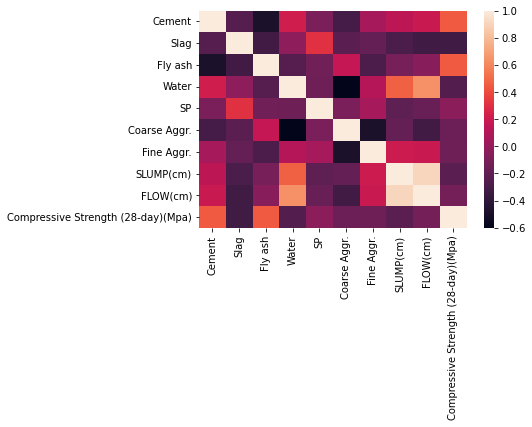

In [14]:
sns.heatmap(df.corr())

In [23]:
X = df.drop("Compressive Strength (28-day)(Mpa)", axis = 1)
y = df["Compressive Strength (28-day)(Mpa)"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:
scaler = StandardScaler()

In [26]:
scale_xtrain = scaler.fit_transform(X_train)
scale_xtest = scaler.transform(X_test)

In [27]:
svrmodel = SVR()

In [28]:
svrmodel.fit(scale_xtrain, y_train)

SVR()

In [29]:
svrpred = svrmodel.predict(scale_xtest)

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [31]:
mean_absolute_error(y_test,svrpred)

4.680550861162789

In [33]:
np.sqrt(mean_squared_error(y_test,svrpred))

6.078255017457036

In [34]:
y_test.mean()

36.718387096774194

## Adding GRID model

In [37]:
svr = SVR()

In [40]:
param_grid = {"C":[0.01, 0.1, 0.2, 0.4, 0.7, 0.9, 1], "kernel":["linear", "poly", "rbf", "sigmoid"], "gamma":["scale", "auto"], "degree":[2, 3, 4, 5, 6], "epsilon":[0, 0.01, 0.1, 0.5, 1, 2, 3]}

In [41]:
grid_model = GridSearchCV(svr, param_grid)

In [42]:
grid_model.fit(scale_xtrain, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.2, 0.4, 0.7, 0.9, 1],
                         'degree': [2, 3, 4, 5, 6],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [43]:
grid_model.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [46]:
grid_preds = grid_model.predict(scale_xtest)

In [47]:
mean_absolute_error(y_test,grid_preds)

1.8530688105851432

In [48]:
np.sqrt(mean_squared_error(y_test,grid_preds))

2.280271292813048